In [1]:
from src.utils.image_loader import ImageLoader
from src.utils.visualisation import DatasetVisualizer


In [2]:
dataset = ImageLoader(root_path=r"C:\Users\PC\Desktop\données\deepfake_database",extensions={".jpg", ".jpeg", ".png"},recursive=True)

In [3]:
dataset.get_dataset_stats()

{'total_images': 19457,
 'extensions': {'.jpeg': 1, '.jpg': 19456, '.png': 0},
 'class_distribution': {'real': 11509, 'df': 7948},
 'class_statistics': {'real': {'count': 11509,
   'extensions': {'.jpeg': 1, '.jpg': 11508}},
  'df': {'count': 7948, 'extensions': {'.jpg': 7948}}}}

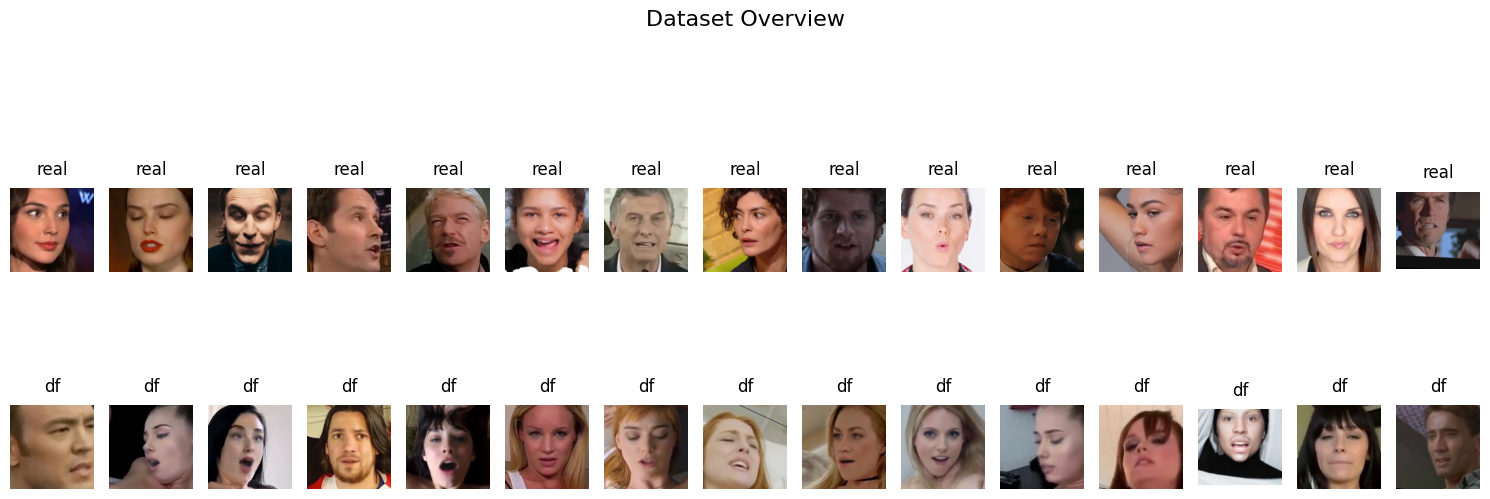

In [4]:
DatasetVisualizer.viz(dataset, images_per_class=15)

In [5]:
splits = dataset.split(train=0.8, val=0.15, test=0.05)


In [6]:
train_dataset = splits['train']
val_dataset = splits['val']
test_dataset = splits['test']

In [11]:
train_dataset.get_dataset_stats()

{'total_images': 15565,
 'extensions': {'.jpeg': 1, '.jpg': 15564, '.png': 0},
 'class_distribution': {'real': 9207, 'df': 6358},
 'class_statistics': {'real': {'count': 9207,
   'extensions': {'.jpeg': 1, '.jpg': 9206}},
  'df': {'count': 6358, 'extensions': {'.jpg': 6358}}}}